In [61]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
#from Ipython.display import clear_output
%matplotlib inline

In [6]:
train = pd.read_csv('../data/fashion-mnist_train.csv')

In [7]:
test = pd.read_csv('../data/fashion-mnist_test.csv')

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = train.drop(['label'], axis = 1).values

In [16]:
X_train.shape

(60000, 784)

In [17]:
type(X_train)

numpy.ndarray

In [18]:
y_train = train['label'].values

In [19]:
X_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [25]:
#Checking the maximum values across each pixel
X_train.max(axis = 0)

array([ 16,  36, 226, 164, 227, 230, 224, 255, 254, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 222, 220, 239, 255,
       180, 189, 105, 167, 219, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 194, 206, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 211, 189, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 212, 188, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 237, 232, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 227,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [26]:
#Normalizing pixel values by dividing 255
X_train = X_train / 255
X_test = X_test / 255

In [28]:
type(X_train)

numpy.ndarray

In [29]:
#Changing into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [33]:
#Creating tensor datasets using dataset class
train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)

In [34]:
type(train)

torch.utils.data.dataset.TensorDataset

In [39]:
train[0] # Tuple containing two tensors - one is data and other is label

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
         0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [40]:
#only data
train[0][0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
        0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
#only label
train[0][1]

tensor(2)

In [141]:
# Defining training and test loader
train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size = 128, shuffle = True)

In [147]:
#Defining Neural Network
#Input --> h1 --> h2 --> h3 --> h4 -->h5 -->out
class Model(nn.Module):
    
    def __init__(self, in_features = 784, h1 = 8, h2 = 16, h3 = 32, h4 = 64, h5 = 128, out_features = 10):
        super(Model ,  self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,h4)
        self.fc5 = nn.Linear(h4,h5)
        self.out = nn.Linear(h5, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.log_softmax(self.out(x))
        
        return x
    

In [148]:
network = Model()

In [149]:
print(network.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=784, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)>


In [150]:
# Defining loss and optimizer and EPOCHS
loss_criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr = 0.01)
EPOCHS = 5

In [151]:
loss_values = list()
accuracy_values = list()

for i in range(EPOCHS):
    for j, data in enumerate(train_loader):
        x, y = data[0].reshape(-1, 784) , data[1]
        y_pred = network.forward(x)
        
        
        
        loss = loss_criterion( y_pred , y)
        accuracy = (torch.sum((torch.argmax(y_pred, 1) == y).float()))/y_pred.shape[0]
        
        
        #appending loss & accuracy values
        loss_values.append(loss)
        accuracy_values.append(accuracy)
        
        #Zeroing gradient
        optimizer.zero_grad()
        
        #doing backward propagation
        loss.backward()
        
        #updating parameters
        optimizer.step()
    
    #Looking at shapes of predicted and actual outputs
    #print(y_pred.shape , y.shape)
    
    #printing loss values after every epoch
    print('Epoch: {} -  loss_values: {} - accuracy: {}'.format(i+1,  loss, accuracy))

C:\Users\suka1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 -  loss_values: 0.4981432855129242 - accuracy: 0.8125
Epoch: 2 -  loss_values: 0.43666860461235046 - accuracy: 0.84375
Epoch: 3 -  loss_values: 0.5663291811943054 - accuracy: 0.7395833134651184
Epoch: 4 -  loss_values: 0.5193310379981995 - accuracy: 0.7708333134651184
Epoch: 5 -  loss_values: 0.4536900818347931 - accuracy: 0.8125


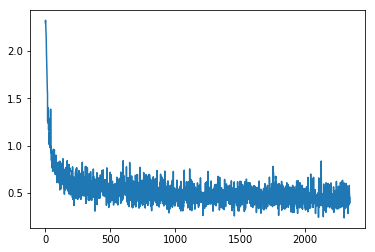

In [153]:
#Evolution of Loss Values
plt.plot(range(len(loss_values)), loss_values)
plt.show()

In [158]:
# Doing Prediction on test data
correct_points = 0
total_points = 0

with torch.no_grad():
    for data in test_loader:
        x, y = data[0].reshape(-1, 784) , data[1]
        y_pred = network.forward(x)
        
        correct_points += torch.sum((torch.argmax(y_pred, 1) == y).float())
        total_points += y.shape[0]
        
        

C:\Users\suka1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [156]:
correct_points

tensor(8401.)

In [159]:
total_points

10000

In [162]:
print('Accuracy on test set: ', (correct_points/total_points).item() )

Accuracy on test set:  0.8400999903678894
